Các thư viện sẽ dùng:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division, print_function, unicode_literals
import time
import math
from math import floor,ceil
import sklearn.linear_model,sklearn.datasets

Các hàm phụ trợ:
- Softmax;
- convert_labels;
- hàm tính cost cho log loss;
- plot_decision_boundary

In [ ]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# cost or loss function
def cost_log(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

def cost_MSE(Y, Yhat):
    return np.sum(0.5*(Y-Yhat)**2)/Y.shape[1]

In [ ]:
def plot_decision_boundary(pred_func):
    # Min and Max values on X and Y axis ,  give them some padding.
    # x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    # y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # h = 0.01
    x_min, x_max = floor(X.T[:, 0].min()) - 1, ceil(X.T[:, 0].max()) + 1
    y_min, y_max = floor(X.T[:, 1].min()) - 1, ceil(X.T[:, 1].max())+ 1
    h_x = (x_max - x_min)/y.shape[0]
    h_y = (y_max - y_min)/y.shape[0]
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), 
                         np.arange(y_min, y_max, h_y), 
                         indexing='xy')
    # Generate a grid of points with distance h between each one of them
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

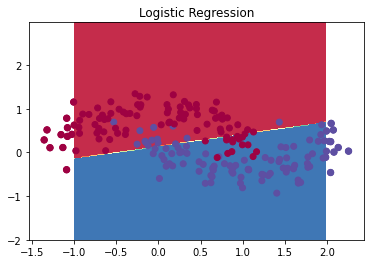

In [ ]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

Tạo dữ liệu giả lấy từ : https://machinelearningcoban.com/2017/02/24/mlp/#-vi-du-tren-python

In [ ]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels
for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,2,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
d1 = 20 # size of first hidden layer
d2 = 15 # size of second hidden layer 
d3 = C 
Y = convert_labels(y, C)
N = X.shape[1]

Khởi tạo model parameters: ma trận trọng số và bias tương ứng với từng layer

In [ ]:
# initialize weights and bias randomly
np.random.seed(42)
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))
W3 = 0.01*np.random.randn(d2, d3)
b3 = np.zeros((d3, 1))

Khởi tạo hyperparameter learning rate,random state , n_iters/epochs


In [ ]:
lr = 0.05 # learning rate
np.random.seed(42)
epochs = 10000

In [ ]:
for i in range(epochs+1):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1   # [d1,d0] * [d0,N*C] + [d1,1]:broad-cast -> [d1,N*C]
    A1 = np.maximum(Z1, 0)     # [d1,N*C] : element-wise
    Z2 = np.dot(W2.T, A1) + b2 # [d2,d1] * [d1,N*C] + [d2,1]:broad-cast -> [d2,N*C]
    A2 = np.maximum(Z2, 0)     # [d2,N*C] : ...
    Z3 = np.dot(W3.T, A2) + b3 # [d3,d2] * [d2,N*C] + [d3,1]:broad-cast -> [d3,N*C]
    A3 = softmax(Z3)                 # [d3,N*C]

    Yhat  = A3
    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost_log(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E3 = (Yhat - Y )/N
    dW3 = np.dot(A2, E3.T)
    db3 = np.sum(E3, axis = 1, keepdims = True)

    E2 = np.dot(W3, E3)
    E2[Z2 <= 0] = 0 # gradient of ReLU
    dW2 = np.dot(A1,E2.T)
    db2 = np.sum(E2 , axis = 1 ,keepdims= True)

    E1 = np.dot(W2,E2)
    E1[Z1 <=0] = 0 # duh
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -lr*dW1
    b1 += -lr*db1
    W2 += -lr*dW2
    b2 += -lr*db2
    W3 += -lr*dW3
    b3 += -lr*db3

iter 0, loss: 1.098611
iter 1000, loss: 1.098603
iter 2000, loss: 1.098576
iter 3000, loss: 1.098322
iter 4000, loss: 0.925556
iter 5000, loss: 0.594282
iter 6000, loss: 0.319715
iter 7000, loss: 0.129787
iter 8000, loss: 0.078319
iter 9000, loss: 0.057305
iter 10000, loss: 0.043142


Predict label của toàn tập dữ liệu

In [ ]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
A2 = np.maximum(Z2, 0)
Z3 = np.dot(W3.T,A2) + b3
predicted_class = np.argmax(Z3,axis = 0)
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

training accuracy: 98.67 %


Data vizualization:

In [ ]:
pad = 0.5
x_min, x_max = floor(X.T[:, 0].min()) - pad, ceil(X.T[:, 0].max()) + pad
y_min, y_max = floor(X.T[:, 1].min()) - pad, ceil(X.T[:, 1].max())+ pad
h_x = (x_max - x_min)/y.shape[0]
h_y = (y_max - y_min)/y.shape[0]
xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y), indexing='xy')
mesh_points = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
Z1 = np.dot(W1.T, mesh_points.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
A2 = np.maximum(Z2, 0)
Z3 = np.dot(W3.T,A2) + b3
predicted_class = np.argmax(Z3,axis = 0)
predicted_class = predicted_class.reshape(xx.shape)

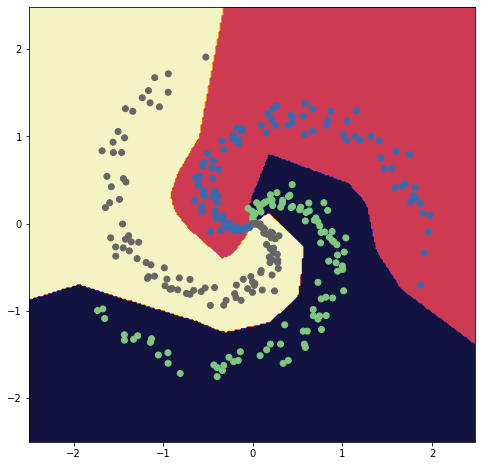

In [ ]:
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, predicted_class, cmap=plt.cm.CMRmap)
plt.scatter(X.T[:, 0], X.T[:, 1], c=y, cmap=plt.cm.Accent)

In [ ]:
# Uncomment dòng lệnh dưới để coi cmap của matplotlib
# dir(plt.cm)

Predict label cho toàn tập dữ liệu

Định nghĩa hàm kích hoạt ReLu cho:

In [ ]:
def ReLU(X):
  return np.maximum(X, 0)

In [ ]:
def Sigmoid(X,deri = False):
  if deri:
    return Sigmoid(X)*(1-Sigmoid(X))
  return 1/(1+np.exp(-X))

Class Layer :

In [ ]:
class Layer():
  def __init__(self,weights_mat_shape,activation_function):
    # Ma trận trọng số và bias
    self.W = 0.1*np.random.randn(weights_mat_shape[0],weights_mat_shape[1])
    self.b = np.zeros((weights_mat_shape[1], 1))
    self.activation_function = activation_function
    self.Z = None
    self.A = None
    self.dW = None
    self.db = None
  def compute_out(self,prev_A):
    self.Z = np.dot(self.W.T, prev_A) + self.b
    
    self.A = self.activation_function(self.Z)
    return self.A

Định nghĩa class ANN, bao gồm:
>- input_set : X
- output_set : y
- config : hyper parameter
- layers: list of Layer object

In [ ]:
class ANN():
  def __init__(self,input_set,output_set,config):
    self.input_set = input_set  #X
    self.output_set = output_set #Y
    self.config = config
    self.layers = []

Định nghĩa hàm feed_forward():

$$\begin{eqnarray}
\mathbf{Z}^{(1)} &=& \mathbf{W}^{(1)T}\mathbf{X} \\
\mathbf{A}^{(1)} &=& \sigma(\mathbf{Z}^{(1)}) \\
\mathbf{Z}^{(2)} &=& \mathbf{W}^{(2)T}\mathbf{A}^{(1)} \\
...\\
\mathbf{\hat{Y}} = \mathbf{A}^{(L-1)} &=& \text{softmax}(\mathbf{Z}^{(L-1)})
\end{eqnarray}$$

In [ ]:
# Ngay chỗ nào class ANN chưa có hàm nào khác
dir(ANN)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [ ]:
def feed_forward(self):
    # Z_(1) 
    prev_A = self.layers[0].compute_out(self.input_set)
    i = 1
    while i <= len(self.layers)-1:
      prev_A = self.layers[i].compute_out(prev_A)
      i+=1

# Add method back_prop into ANN class
ANN.feed_forward = feed_forward

In [ ]:
dir(ANN)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'feed_forward']

Định nghĩa hàm back_prop():

$$$$\begin{eqnarray}
\mathbf{Z}^{(1)} &=& \mathbf{W}^{(1)T}\mathbf{X} \\
\mathbf{A}^{(1)} &=& \sigma(\mathbf{Z}^{(1)}) \\
\mathbf{Z}^{(2)} &=& \mathbf{W}^{(2)T}\mathbf{A}^{(1)} \\
...\\
\mathbf{\hat{Y}} = \mathbf{A}^{(L-1)} &=& \text{softmax}(\mathbf{Z}^{(L-1)})
\end{eqnarray}$$$$

$$\begin{eqnarray}
\frac{\partial J}{\partial \mathbf{W}^{(L)}} &=& \mathbf{a}^{(L-1)}\mathbf{e}^{(L)T}\\
\frac{\partial J}{\partial \mathbf{b}^{(L)}} &=&  \mathbf{e}^{(L)}
\end{eqnarray}$$

$$\mathbf{e}^{(L)} = \frac{\partial J}{\partial \mathbf{z}^{(L)}}$$

$$\begin{eqnarray}
e_j^{(l)} &
 &=&\left( \mathbf{w}_{j:}^{(l+1)} \mathbf{e}^{(l+1)} \right) f’(z_j^{(l)}) \\
\end{eqnarray}$$

$$\mathbf{e}^{(l)} = \left( \mathbf{W}^{(l+1)} \mathbf{e}^{(l+1)} \right) \odot f’(\mathbf{z}^{(l)})$$

In [ ]:
def back_prop(self):
    Y_hat = self.layers[-1].A                                                   # Y_hat được tính lần đầu tiên
                                                                                              # np.dot(self.weights_last.T, prev_A )
    if self.config.cost_function.__name__ == 'cost_log':
      E_last = (Y_hat - self.output_set)/(self.input_set.shape[1])  # E_last chỗ này là E
    if self.config.cost_function.__name__ == 'cost_MSE':
      E_last =  (2*(self.Y_hat - self.output_set))/(self.input_set.shape[1])
      E_last =  E_last * Sigmoid(self.layers[-1].Z,True)                                         

                                                                                                    # Nên ta không đưa E_last này vào vòng lặp bên dưới
    self.layers[-1].dW = np.dot(self.layers[-2].A,E_last.T)             # Cập nhập dW và db
    self.layers[-1].db = np.sum(E_last, axis = 1, keepdims = True)

    i = len(self.layers) - 2
    while i >=1:

      E_last = np.dot(self.layers[i+1].W,E_last)                                 # E(i) = np.dot(W(i+1), E(i+1)) (tích Hadamard) (f'(Z))
      if self.layers[i].activation_function.__name__ == 'ReLU':         # Cần được mở rộng bằng 1 hàm nào đó
        E_last[self.layers[i].Z<=0] = 0                                                 # ReLu :  max(0,X) - element-wise
                                                                                                        # ReLu' : 0 ∀ X <= 0 , 1 otherwise.
      
      if self.layers[i].activation_function.__name__ == 'Sigmoid':      
        E_last = E_last * Sigmoid(self.layers[i].Z,True)
        

      self.layers[i].dW = np.dot(self.layers[i-1].A,E_last.T)                  # dW(i) =  np.dot(A(i-1),E(i).T)
      self.layers[i].db = np.sum(E_last, axis = 1 , keepdims= True)    # db(i)  = np.sum(E(i),axis = 1 , keepsdims=True)
      i -= 1

    E_last = np.dot(self.layers[1].W,E_last)
    if self.layers[0].activation_function.__name__ == 'ReLU':     
      E_last[self.layers[i].Z<=0] = 0  
    if self.layers[i].activation_function.__name__ == 'Sigmoid':      
      E_last = E_last * Sigmoid(self.layers[i].Z,True)

    self.layers[0].dW = np.dot(self.input_set,E_last.T)
    self.layers[0].db = np.sum(E_last, axis = 1 , keepdims= True )

# Add method back_prop into ANN class
ANN.back_prop = back_prop

- Định nghĩa hàm train với điều kiện dừng là loss < 0.01;
- Định nghĩa hàm update ma trận trọng số W và bias b cho từng layer;
- Định nghĩa hàm predict.

In [ ]:
def update_gradient_descent(self):
  for i in range(len(self.layers)):
    self.layers[i].W += -self.config.lr*self.layers[i].dW
    self.layers[i].b += -self.config.lr*self.layers[i].db

ANN.update_gradient_descent = update_gradient_descent

def training(self,epochs = 10000):
  error_list = []
  for epoch in range(epochs):
    self.feed_forward()
    self.back_prop()
    self.update_gradient_descent()
    Y = self.output_set
    Y_hat = self.layers[-1].A
    loss = self.config.cost_function(Y, Y_hat)
    if epoch %1000 == 0:
      print("iter %d, loss: %f" %(epoch, loss))
    if loss < 10**(-1):
      break
    error_list.append(loss)
  return error_list

ANN.training = training

def predict(self,X_test):
  Z = np.dot(self.layers[0].W.T,X_test) + self.layers[0].b
  A = self.layers[0].activation_function(Z)
  for i,layer in enumerate(self.layers):
    if i!=0:
      Z = np.dot(layer.W.T,A) + layer.b
      A = layer.activation_function(Z)
  predict = np.argmax(Z,axis = 0)
  return predict

ANN.predict = predict

Định nghĩa Class config chứa các hyperparameter

In [ ]:
class Config:
  def __init__(self,lr=0.05,layers = (100,),activation_function =ReLU ,cost_function=cost_log):
    self.lr = lr
    self.layers = layers
    self.activation_function = activation_function
    self.cost_function = cost_function

In [ ]:
class ANN():
  def __init__(self,input_set,output_set,config):
    self.config = config
    self.layers = []
    self.input_set = input_set
    self.output_set = output_set
    for i,neurons in enumerate(self.config.layers):
      if i!= len(config.layers) - 1:
        self.add_layer(neurons,activation_function=config.activation_function)
      else:
        self.add_layer(neurons,activation_function=softmax)
  
  def add_layer(self,neurons_numbs,activation_function):
    if len(self.layers) == 0:
      weights_shape = (self.input_set.shape[0],neurons_numbs)
      layer = Layer(weights_shape,activation_function)
      self.layers.append(layer)
    else:
      weights_shape = (self.layers[-1].W.shape[1],neurons_numbs)
      layer = Layer(weights_shape,activation_function)
      self.layers.append(layer)
  
  def feed_forward(self):
      prev_A = self.layers[0].compute_out(self.input_set)
      i = 1
      while i <= len(self.layers)-1:
        prev_A = self.layers[i].compute_out(prev_A)
        i+=1
  def back_prop(self):
      Y_hat = self.layers[-1].A                                                   # Y_hat được tính lần đầu tiên
                                                                                                # np.dot(self.weights_last.T, prev_A )
      
      if self.config.cost_function.__name__ == 'cost_log':
        E_last = (Y_hat - self.output_set)/(self.input_set.shape[1])  # E_last chỗ này là E
      if self.config.cost_function.__name__ == 'cost_MSE':
        E_last =  (2*(self.Y_hat - self.output_set))/(self.input_set.shape[1])
      
        E_last =  E_last * Sigmoid(self.layers[-1].Z,True)                                         

                                                                                                      # Nên ta không đưa E_last này vào vòng lặp bên dưới
      self.layers[-1].dW = np.dot(self.layers[-2].A,E_last.T)             # Cập nhập dW và db
      self.layers[-1].db = np.sum(E_last, axis = 1, keepdims = True)

      i = len(self.layers) - 2
      while i >=1:

        E_last = np.dot(self.layers[i+1].W,E_last)                                 # E(i) = np.dot(W(i+1), E(i+1)) (tích Hadamard) (f'(Z))
        if self.layers[i].activation_function.__name__ == 'ReLU':         
          E_last[self.layers[i].Z<=0] = 0                                                 # ReLu :  max(0,X) - element-wise
                                                                                                         # ReLu' : 0 ∀ X < 0 , 1 otherwise.
        
        if self.layers[i].activation_function.__name__ == 'Sigmoid':      
          E_last = E_last * Sigmoid(self.layers[i].Z,True)
          

        self.layers[i].dW = np.dot(self.layers[i-1].A,E_last.T)                  # dW(i) =  np.dot(A(i-1),E(i).T)
        self.layers[i].db = np.sum(E_last, axis = 1 , keepdims= True)    # db(i)  = np.sum(E(i),axis = 1 , keepsdims=True)
        i -= 1

      E_last = np.dot(self.layers[1].W,E_last)
      if self.layers[0].activation_function.__name__ == 'ReLU':     
        E_last[self.layers[i].Z<=0] = 0  
      if self.layers[i].activation_function.__name__ == 'Sigmoid':      
        E_last = E_last * Sigmoid(self.layers[i].Z,True)
      
      self.layers[0].dW = np.dot(self.input_set,E_last.T)
      self.layers[0].db = np.sum(E_last, axis = 1 , keepdims= True )

  def update_gradient_descent(self):
    for i in range(len(self.layers)):
      self.layers[i].W += -self.config.lr*self.layers[i].dW
      self.layers[i].b += -self.config.lr*self.layers[i].db
  
  def training(self,epochs = 10000):
    error_list = []
    for epoch in range(epochs):
      self.feed_forward()
      self.back_prop()
      self.update_gradient_descent()
      Y = self.output_set
      Y_hat = self.layers[-1].A
      loss = self.config.cost_function(Y, Y_hat)
      if epoch %1000 == 0:
        print("iter %d, loss: %f" %(epoch, loss))
      if loss < 10**(-1):
        break
      error_list.append(loss)
    return error_list
  def predict(self,X_test):
    Z = np.dot(self.layers[0].W.T,X_test) + self.layers[0].b
    A = self.layers[0].activation_function(Z)
    for i,layer in enumerate(self.layers):
      if i!=0:
        Z = np.dot(layer.W.T,A) + layer.b
        A = layer.activation_function(Z)
    predict = np.argmax(Z,axis = 0)
    return predict

In [ ]:
N = 20 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes

X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

d1 = 20 # size of hidden layer
Y = convert_labels(y, C)

In [ ]:
config = Config(layers=(d1,C),activation_function= Sigmoid)
ann = ANN(X,Y,config)

In [ ]:
start = time.time()
error_list = ann.training(25000)
end = time.time()
print("Time to train ",len(error_list)," epochs ",end-start,", on average:",(end-start)/len(error_list))

iter 0, loss: 1.098879
iter 1000, loss: 1.097580
iter 2000, loss: 1.074704
iter 3000, loss: 0.890999
iter 4000, loss: 0.766459
iter 5000, loss: 0.749114
iter 6000, loss: 0.745877
iter 7000, loss: 0.743865
iter 8000, loss: 0.741726
iter 9000, loss: 0.739254
iter 10000, loss: 0.736378
iter 11000, loss: 0.733058
iter 12000, loss: 0.729264
iter 13000, loss: 0.724970
iter 14000, loss: 0.720129
iter 15000, loss: 0.714641
iter 16000, loss: 0.708305
iter 17000, loss: 0.700716
iter 18000, loss: 0.691102
iter 19000, loss: 0.678090
iter 20000, loss: 0.659649
iter 21000, loss: 0.633787
iter 22000, loss: 0.599937
iter 23000, loss: 0.559764
iter 24000, loss: 0.516742
Time to train  25000  epochs  6.730382204055786 , on average: 0.00026921528816223144


In [ ]:
predict = ann.predict(X)
print('training accuracy: %.2f %%' % (100*np.mean(predict == y)))

training accuracy: 75.00 %


In [ ]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes

X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

Y = convert_labels(y, C)
config = Config(layers=(50,20,C),activation_function= ReLU)
np.random.seed(42)
ann = ANN(X,Y,config)
start = time.time()
error_list = ann.training(25000)
end = time.time()
print("Time to train ",len(error_list)," epochs ",end-start,", on average:",(end-start)/len(error_list))

iter 0, loss: 1.096831
iter 1000, loss: 0.632322
iter 2000, loss: 0.254077
iter 3000, loss: 0.107934
Time to train  3127  epochs  2.6564040184020996 , on average: 0.0008495056023031978


In [ ]:
predict = ann.predict(X)
print(100*np.mean(predict == y))

97.66666666666667


In [ ]:
config = Config(layers=(100,20,C),activation_function= ReLU)
np.random.seed(42)
ann = ANN(X,Y,config)
start = time.time()
error_list = ann.training(25000)
end = time.time()
print("Time to train ",len(error_list)," epochs ",end-start,", on average:",(end-start)/len(error_list))

iter 0, loss: 1.099678
iter 1000, loss: 0.523140
iter 2000, loss: 0.174736
Time to train  2775  epochs  3.3490474224090576 , on average: 0.001206863936003264


In [ ]:
predict_class = ann.predict(X)
print(100*np.mean(predict_class == y))

97.33333333333334


Hàm phụ trợ: plot dự đoán

In [ ]:
def plot_hit_or_miss(X,y_true,y_pred):
  miss = np.where(y_pred!=y_true)[0]
  hit = np.where(y_pred==y_true)[0]

  miss_data = X[:,miss]
  hit_data = X[:,hit]

  plt.scatter(hit_data[0],hit_data[1],color = 'blue',label = "hit")
  plt.scatter(miss_data[0],miss_data[1],color = 'red', label = "miss")

  plt.legend(loc="best")

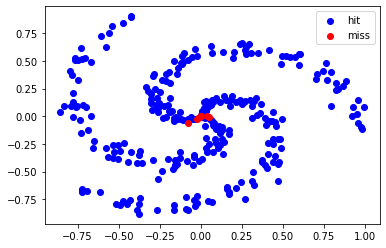

In [ ]:
plot_hit_or_miss(X,y,predict_class)

In [ ]:
def plot_decision_boundary(pred_func,X,y):
    # Min and Max values on X and Y axis ,  give them some padding.
    pad = 0.5
    x_min, x_max = floor(X[:, 0].min()) - pad, ceil(X[:, 0].max()) + pad
    y_min, y_max = floor(X[:, 1].min()) - pad, ceil(X[:, 1].max())+ pad
    h_x = (x_max - x_min)/y.shape[0]
    h_y = (y_max - y_min)/y.shape[0]
  
    # Generate a grid of points with distance h between each one of them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y), indexing='xy')
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    # Predict the function value for the whole gid
    if pred_func != None:
      Z = pred_func(mesh_points.T)
      Z = Z.reshape(xx.shape)
      # Plot the contour and training examples
      plt.figure(figsize=(12,12))
      plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
      plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

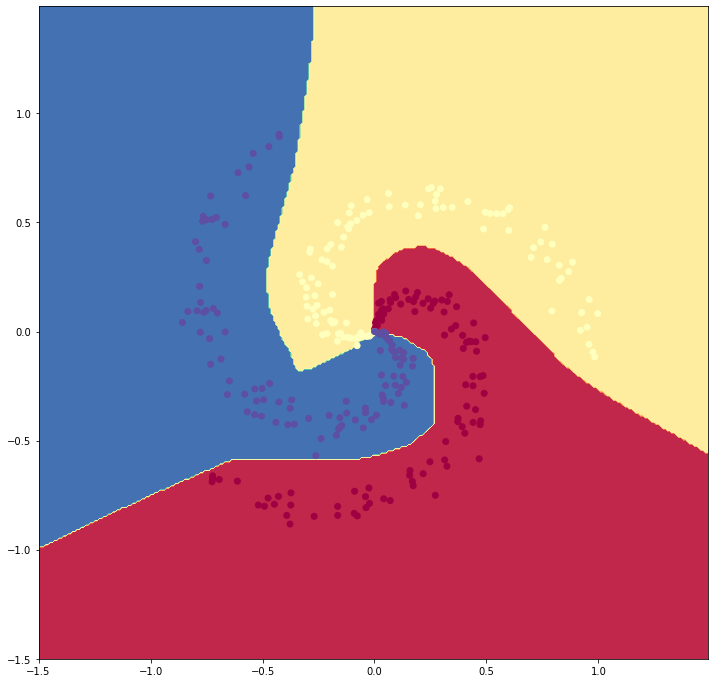

In [ ]:
plot_decision_boundary(ann.predict,X.T,y)

Coi sự thay đổi của W khi train 1 epoch:

In [ ]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 2 # number of classes

X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

Y = convert_labels(y, C)
config = Config(layers=(3,C),activation_function= ReLU)
np.random.seed(42)
ann = ANN(X,Y,config)

Trước khi train:

In [ ]:
ann.layers[0].W

array([[ 0.04967142, -0.01382643,  0.06476885],
       [ 0.15230299, -0.02341534, -0.0234137 ]])

In [ ]:
ann.layers[0].b

array([[0.],
       [0.],
       [0.]])

In [ ]:
ann.layers[1].W

array([[ 0.15792128,  0.07674347],
       [-0.04694744,  0.054256  ],
       [-0.04634177, -0.04657298]])

In [ ]:
ann.layers[1].b

array([[0.],
       [0.]])

In [ ]:
ann.training(1)

iter 0, loss: 0.694137


[0.6941366608269148]

Sau khi train:

In [ ]:
ann.layers[0].W

array([[ 0.04959401, -0.01386952,  0.0647687 ],
       [ 0.15205896, -0.02302371, -0.0234146 ]])

In [ ]:
ann.layers[0].b

array([[-2.56132943e-04],
       [-1.90252030e-04],
       [ 1.29701996e-06]])

In [ ]:
ann.layers[1].W,ann.layers[1].b

(array([[ 0.15741608,  0.07724867],
        [-0.04686271,  0.05417128],
        [-0.04629451, -0.04662024]]), array([[-2.51581006e-05],
        [ 2.51581006e-05]]))

In [ ]:
import inspect
lines = inspect.getsource(foo)
print(lines)

def foo():
  print("Hello world",self)



In [ ]:
import numpy as np
# Number of features
n = 1000
# Number of training examples
m = 10000
# Initialize X and W
X = np.random.rand(n,m)
W = np.random.rand(n,1)

%time a=np.dot(W.T,X)

CPU times: user 12.5 ms, sys: 4 µs, total: 12.5 ms
Wall time: 6.31 ms


In [ ]:
def foo():
  Z = np.zeros((1,m))
  for i in range(X.shape[1]):
    for j in range(X.shape[0]):
        Z[0][i] += W[j]*X[j][i]

In [ ]:
%time foo()

CPU times: user 36.3 s, sys: 8.93 ms, total: 36.3 s
Wall time: 36.3 s


In [ ]:
def foo_2():
  Z = np.zeros((1,m))
  for i in range(0,X.shape[1]):
    for j in range(0,X.shape[0],4):
        Z[0][i] += W[j]*X[j][i] + W[j]*X[j+1][i] + W[j]*X[j+2][i] + W[j]*X[j+3][i]

In [ ]:
%time foo_2()

CPU times: user 27.7 s, sys: 4.96 ms, total: 27.7 s
Wall time: 27.7 s
